<a href="https://colab.research.google.com/github/PhanQuangTan/CS114.K21/blob/master/round3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Link data [link text](https://drive.google.com/drive/u/2/folders/1QWUvs-IIL2123I17TkNVzPR5aoFiqXJR)

In [0]:
import requests
file_url = 'https://cs.uit.edu.vn/data3.txt'
r = requests.get(file_url, stream = True)
with open('/content/drive/My Drive/Dataset/data.txt', 'wb') as file:
  for block in r.iter_content(chunk_size = 1024):
    if block:
      file.write(block)

In [0]:
# Nguồn Kaggle
import numpy as np
import pandas as pd
def paretxt(fname):
  for line in open(fname, 'r'):
    yield eval(line)

In [0]:
file_name = '/content/drive/My Drive/Dataset/data3.txt'
data = list(paretxt(file_name))

In [6]:
df = pd.DataFrame(data)
df.columns=['size', 'time']
print(df)

           size     time
0      37837612  4.12166
1      37395246  3.92089
2      36610827  3.21540
3      29555651  2.54506
4      25928216  2.21831
...         ...      ...
10585  26872494  2.35117
10586  20753811  1.79155
10587  33520323  2.90918
10588  21243264  1.80292
10589  21380484  1.82795

[10590 rows x 2 columns]


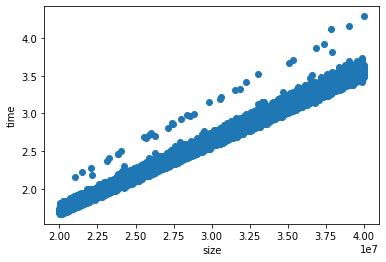

In [7]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.scatter(df['size'], df['time'])
plt.xlabel('size')
plt.ylabel('time')
plt.show()

In [0]:
X = df['size']
y = df['time']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [0]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

In [10]:
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
pred = regr.predict(X_test)
print(pred)

[3.4809277  2.3438796  3.27109806 ... 2.3887245  2.43730654 1.79632983]


In [12]:
print('He So: \n', regr.coef_)

He So: 
 [9.27421382e-08]


In [13]:
from sklearn.metrics import mean_squared_error, r2_score
print('Loi binh phuong: %.6f' % mean_squared_error(y_test, pred))
print('He so xac dinh: %.6f' % r2_score(y_test, pred))

Loi binh phuong: 0.002977
He so xac dinh: 0.989769


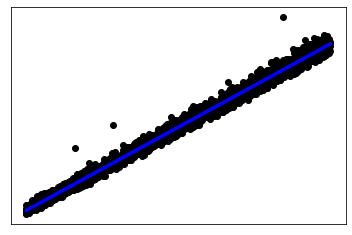

In [14]:
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

# - kết quả tệ hơn model cũ.
# - vấn gặp phải overfitting. vì data mới có nhiều dữ liệu nhiễu hơn.

In [0]:
import math

In [16]:
a = []
a = df['size']
l = len(a)
for i in range(l):
  a[i] = a[i]*math.log(a[i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [17]:
print(a)

0        660221461
1        652062929
2        637608838
3        508409969
4        442616487
           ...    
10585    459697376
10586    349665197
10587    580828842
10588    358406799
10589    360859575
Name: size, Length: 10590, dtype: int64


In [0]:

df['size^2'] = df['size'] * df['size']
df['size*loge(size)'] =  a
                                  

In [19]:
print(df)

            size     time              size^2  size*loge(size)
0      660221461  4.12166  435892377564974521        660221461
1      652062929  3.92089  425186063376059041        652062929
2      637608838  3.21540  406545030295710244        637608838
3      508409969  2.54506  258480696578580961        508409969
4      442616487  2.21831  195909354564221169        442616487
...          ...      ...                 ...              ...
10585  459697376  2.35117  211321677501285376        459697376
10586  349665197  1.79155  122265749993048809        349665197
10587  580828842  2.90918  337362143699060964        580828842
10588  358406799  1.80292  128455433569426401        358406799
10589  360859575  1.82795  130219632869180625        360859575

[10590 rows x 4 columns]


In [0]:
X_3 = df[['size', 'size^2', 'size*loge(size)']]
y_3 = df['time']
X_3_train, X_3_test, y_3_train, y_3_test = train_test_split(X_3, y_3, test_size = 0.2, random_state = 0)

In [21]:
print(X_3_train)

           size              size^2  size*loge(size)
3597  367141337  134792761334147569        367141337
9849  336750203  113400699220541209        336750203
7214  366546557  134356378448554249        366546557
3701  698199011  487481858961378121        698199011
9405  640565671  410324378863680241        640565671
...         ...                 ...              ...
9225  487618984  237772273557192256        487618984
4859  500999656  251000655312118336        500999656
3264  552121106  304837715690663236        552121106
9845  593266249  351964842202530001        593266249
2732  614995752  378219774978045504        614995752

[8472 rows x 3 columns]


In [0]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

In [23]:
regr.fit(X_3_train, y_3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
pred_3 = regr.predict(X_3_test)
print(pred_3)

[3.48618374 2.34119278 3.27257658 ... 2.38572694 2.4340355  1.802273  ]


In [25]:
print('He So: \n', regr.coef_)
from sklearn.metrics import mean_squared_error, r2_score
print('Loi binh phuong: %.6f' % mean_squared_error(y_3_test, pred_3))


He So: 
 [2.50539680e-09 8.03810524e-20 2.50539680e-09]
Loi binh phuong: 0.002978


In [27]:
print('He so xac dinh: %.10f' % r2_score(y_test, pred))
print('He so xac dinh: %.10f' % r2_score(y_3_test, pred_3))

He so xac dinh: 0.9897687773
He so xac dinh: 0.9897660374
